In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 31st, 2022 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://ubc-cs.github.io/cpsc330-2023W1/docs/homework_instructions.html). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


**When you are ready to submit your assignment do the following:**

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

## Imports

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<!-- BEGIN QUESTION -->



In [3]:
...

Ellipsis

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

task: predicts reviews_per_month. predict how popular future listings might be.
what is reviews_per_month: number of reviews the listing has over its lifetime.
to do that we can use the existing reviews_per_month data to create a model and train it that uses that and other information and the model would be capable of making such predictions. 
- values such as first_review and last_review could be helpful since you can see the period of time between the two
- also the number_of_reviews since it is the total over the whole lifetime
- there are actually a lot of things that could be useful, like so many other factors. just have to play with them all and find the best ones.


In [65]:
nyc_df = pd.read_csv("data/AB_NYC_2019.csv", index_col=0)
nyc_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [66]:
train_df, test_df = train_test_split(nyc_df, test_size=0.7, random_state=123)

print(train_df.shape)
print(test_df.shape)


(14668, 15)
(34227, 15)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_1. handling missing data by replacing all with NaN so it is easier to find them later_


_2. summerize numeric features:_

_- host_id_

_- latitude_

_- longtitude_

_- number_of_reviews: The number of reviews the listing has._

_- reviews_per_month: num of reviews the listing has over the lifetime of the listing._

_- price_

_- minimum_nights: min number of night stay for the listing._

_- calculated_host_listings_count: num of listings the host has in the current scrape, in the city/region geography._

_- availibility: The availability of the listing x days in the future as determined by the calendar._
  

_3. summerize categorical features_

_- host id: insights into diversity or concentration of hosts_

_- neighbourhood group: count of listings in each neighbourhood group. understanding the distribution of listings across different neighbourhood groups helps with understanding the geographical spread of the listings (hopefully)_

_- neighborhood: count of listings in each neighborhood. helps withunderstanding popularity and density of listings in different areas_

_- room_type: count of listings for each room type. the distribution of room types is directly related to type of accomodation offer_


_4. historgrams of numeric featuress to help understand the distribution of the values_


_5. bar plots for categorical features to visualize them_


_6. scatter plot of latitude vs Longtitude: gives insights into the geographical distribution of listings, which could be a potential fact_


_7. identifying outliers: create box plots used for identifying outliers_


_8. examining the distribution: histogram for target variable (reviews_per_month)_
  
    

In [131]:
# examining train_df
#train_df.sort_index()

# if missing values, replace with nan to prevent error encounters
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

train_df.sort_index()


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,2019-06-23,NaN,1.0,365.0
5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
5121,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0
5178,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36481615,"Peaceful space in Greenpoint, BK",274298453.0,Adrien,Brooklyn,Greenpoint,40.72585,-73.94001,Private room,54.0,6.0,0.0,2019-06-23,NaN,1.0,15.0
36482783,Brooklyn Oasis in the heart of Williamsburg,274307600.0,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190.0,7.0,0.0,2019-06-23,NaN,1.0,341.0
36484363,QUIT PRIVATE HOUSE,107716952.0,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65.0,1.0,0.0,2019-06-23,NaN,2.0,163.0


In [68]:

# summerize numerical features
nyc_summary = train_df.describe() #train_df.describe(include = 'all')
print(nyc_summary)

numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_cols)
numeric_cols.sort()

# what is highest number of reviews_per_month? 20.94!

            host_id      latitude     longitude         price  minimum_nights  \
count  1.466800e+04  14668.000000  14668.000000  14668.000000    14668.000000   
mean   6.672600e+07     40.728951    -73.951374    150.803041        7.149032   
std    7.799811e+07      0.054727      0.046613    232.976228       24.708738   
min    2.438000e+03     40.507080    -74.242850      0.000000        1.000000   
25%    7.791928e+06     40.689963    -73.982503     69.000000        1.000000   
50%    3.028359e+07     40.722800    -73.955170    105.000000        3.000000   
75%    1.057002e+08     40.763480    -73.935703    175.000000        5.000000   
max    2.743076e+08     40.912340    -73.712990   9999.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       14668.000000       11682.000000                    14668.000000   
mean           23.089855           1.356303                        6.732002   
std            44.061263         

In [69]:

# summerize categorical features
train_df['host_id'].value_counts # how many hosts?
#train_df['host_has_profile_pic'].value_counts # how many hosts have profile pic? might be relevant for the trustworthiness and creds
#train_df['host_identity_verified'].value_counts # how many hosts are verified? trustworthiness

train_df['neighbourhood_group'].value_counts # count of listings in each neighbourhood group

train_df['neighbourhood'].value_counts # count of listings in each neighborhood

train_df['room_type'].value_counts # count of listings for each room type

<bound method IndexOpsMixin.value_counts of id
28330508    Entire home/apt
32874857    Entire home/apt
3655007        Private room
22406109    Entire home/apt
29883990       Private room
                 ...       
5885201        Private room
12325045    Entire home/apt
13915004    Entire home/apt
21897845       Private room
12711351       Private room
Name: room_type, Length: 14668, dtype: object>

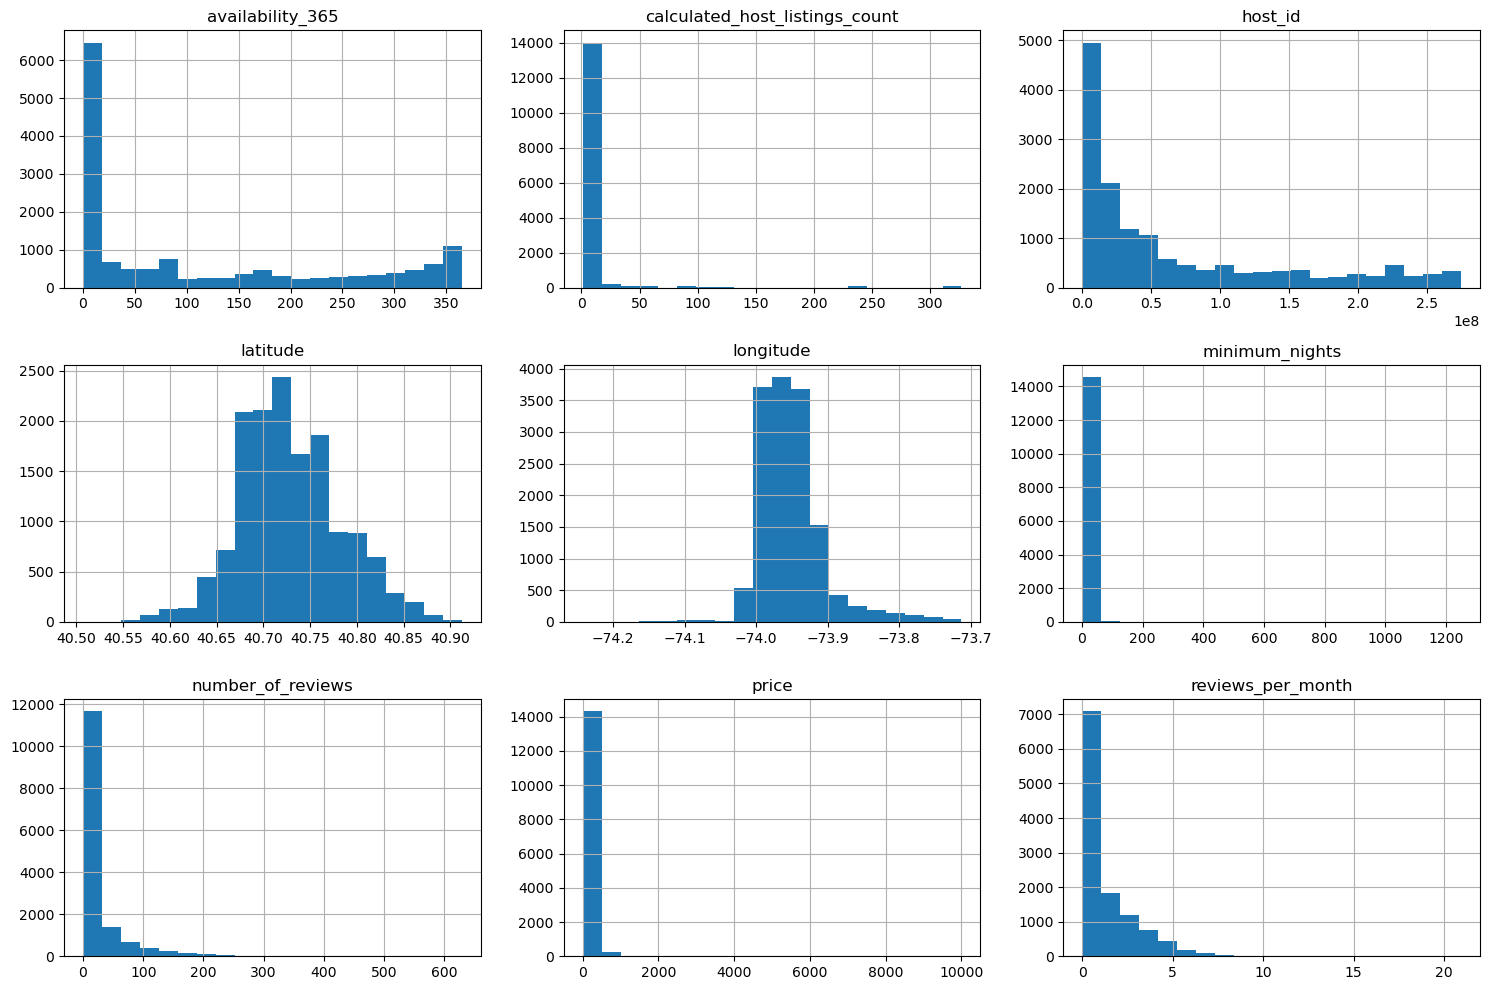

In [70]:
# histograms of numeric features
train_df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

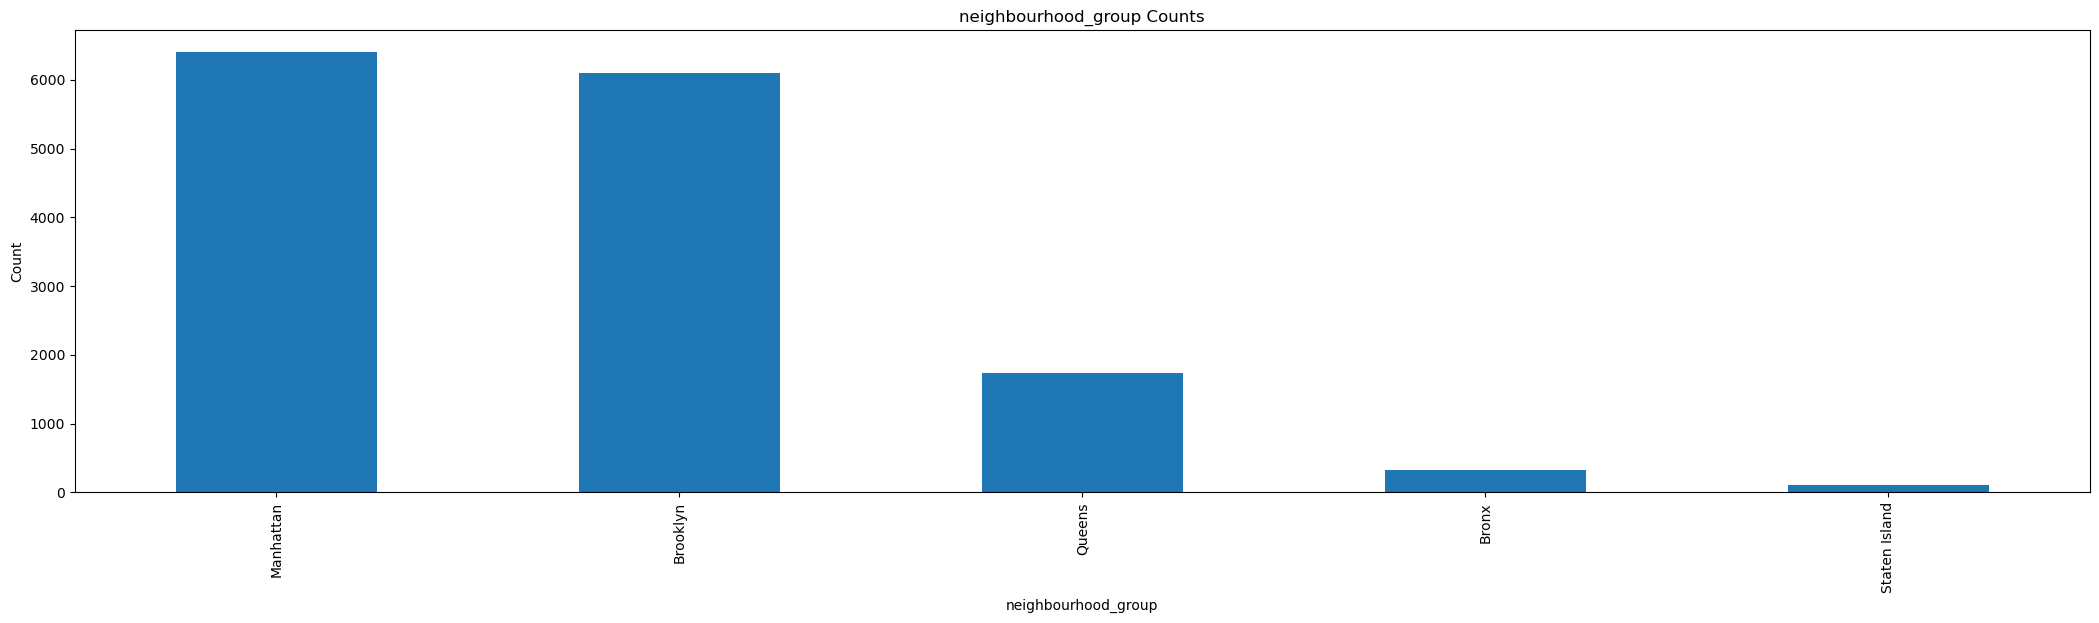

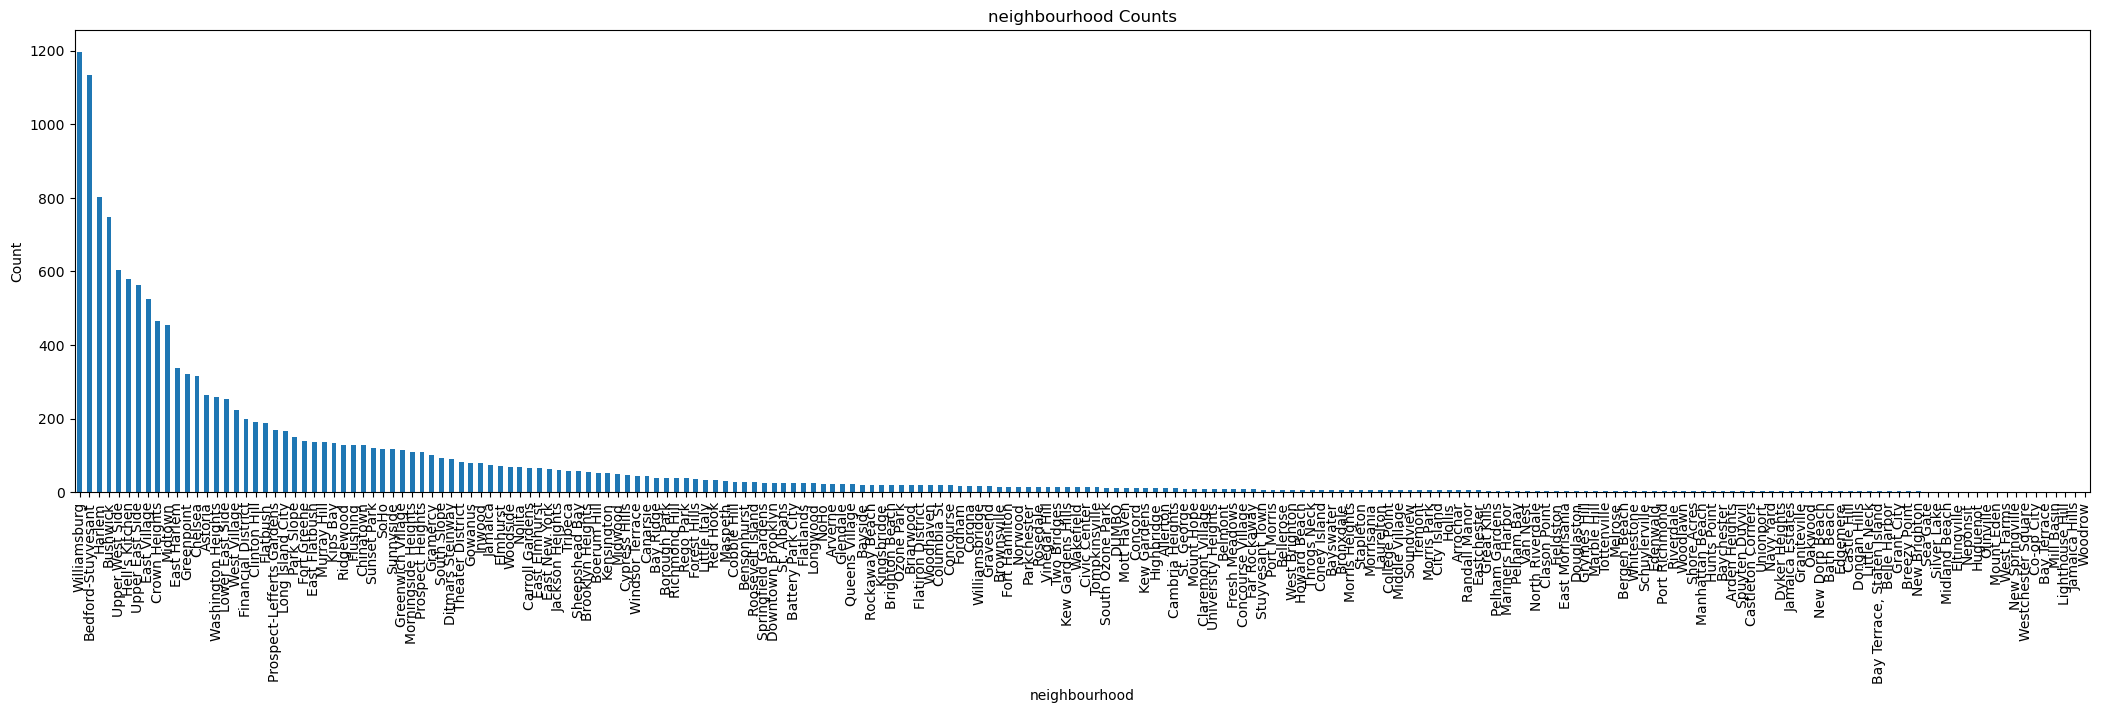

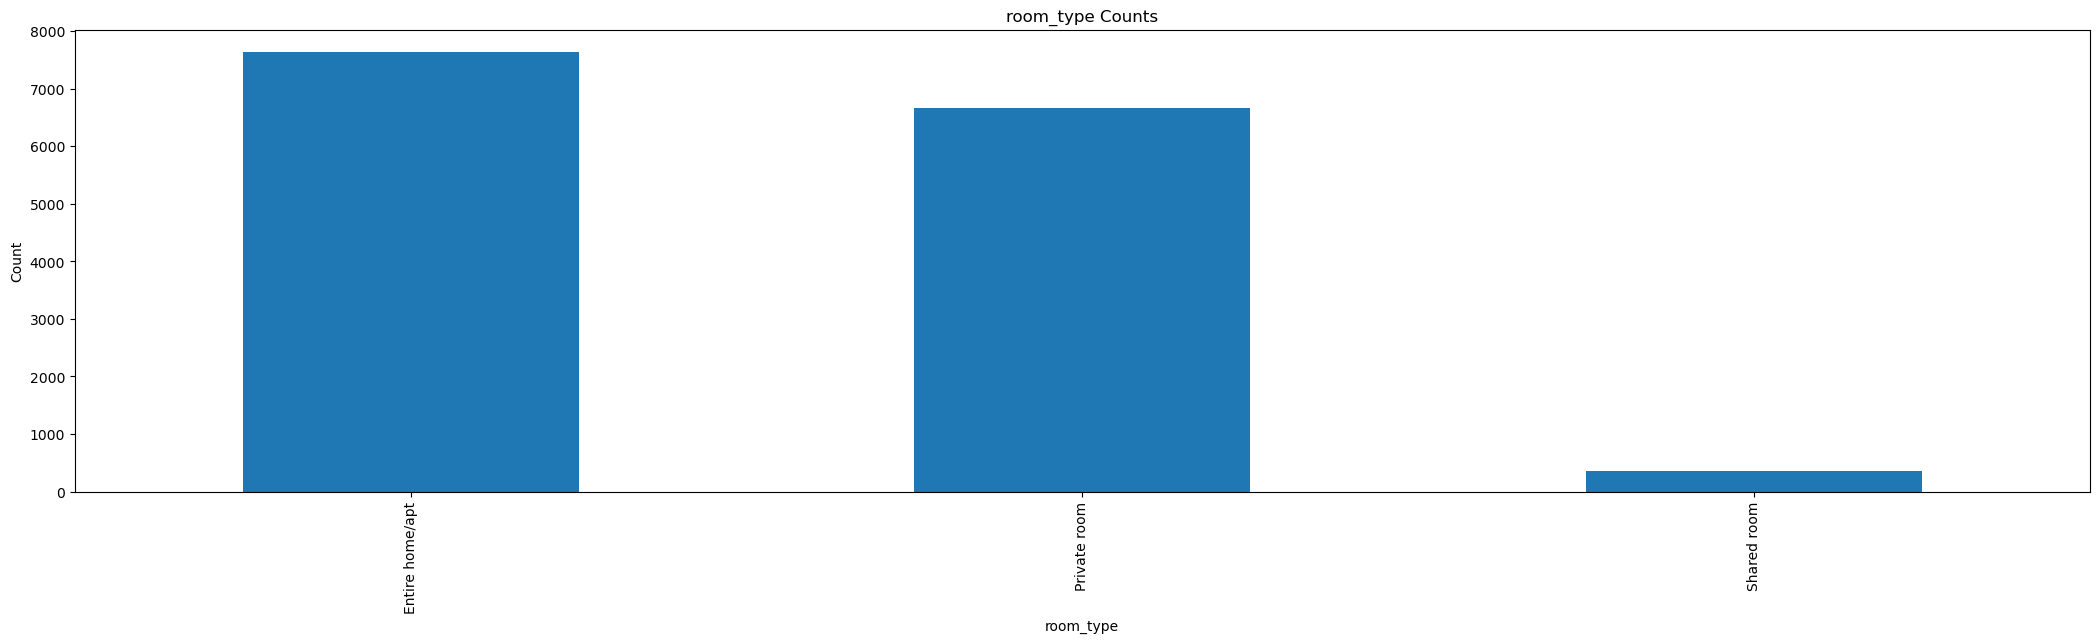

In [71]:
categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']

# counting the occurrences of each category
for col in categorical_cols:
    category_counts = train_df[col].value_counts()
    plt.figure(figsize=(26, 6)) 
    category_counts.plot(kind='bar', title=f'{col} Counts')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    

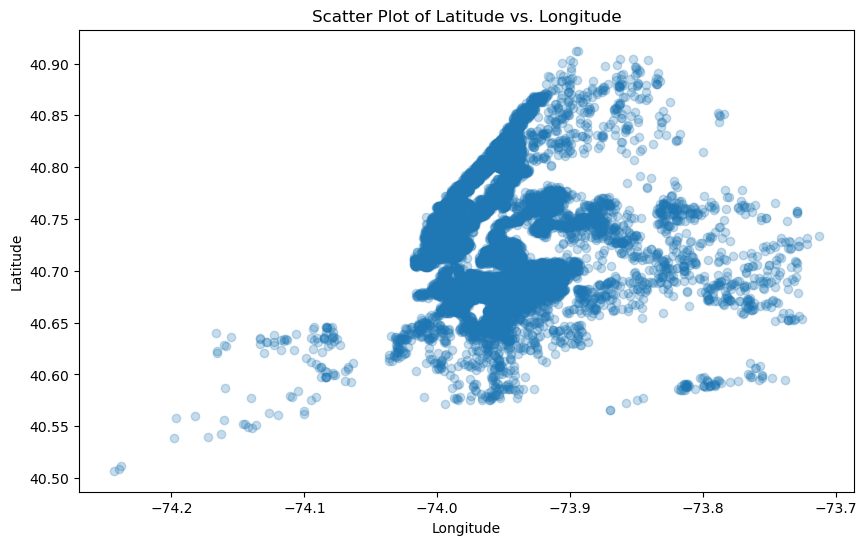

In [72]:

# scatterplot of latitude vs. longtitude

# select features
latitude = train_df['latitude']
longitude = train_df['longitude']

# create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, alpha=0.25)
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

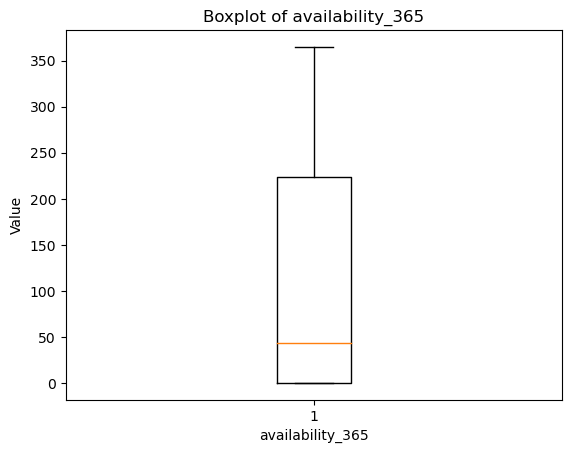

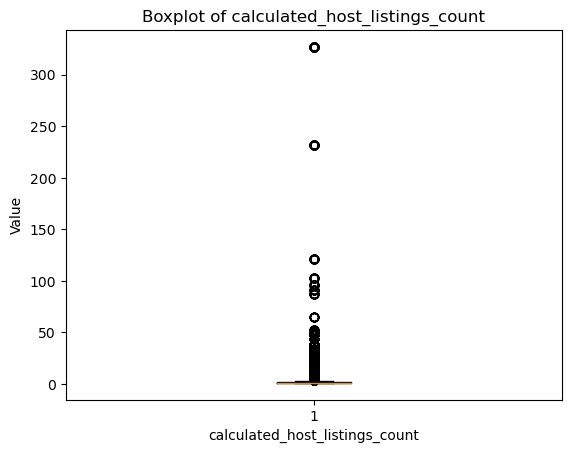

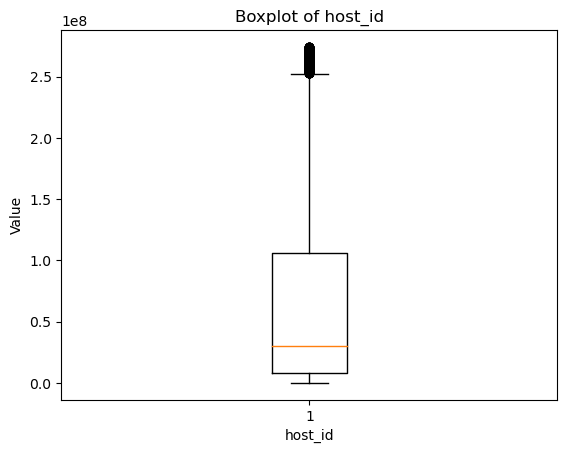

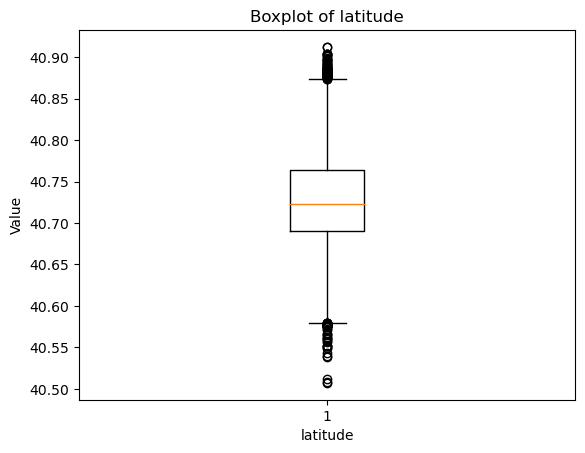

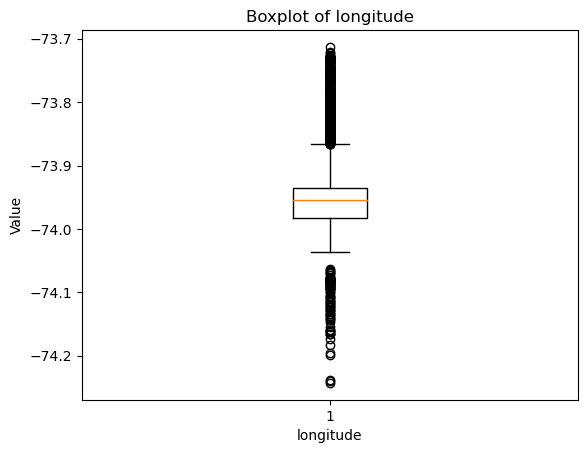

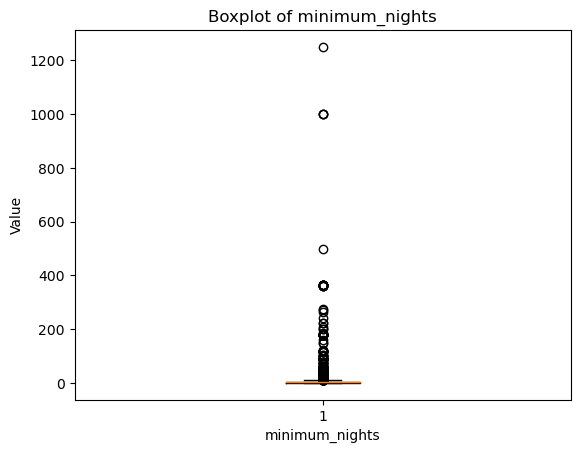

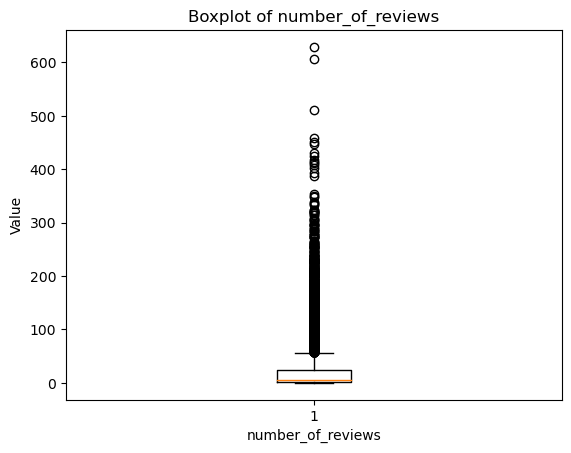

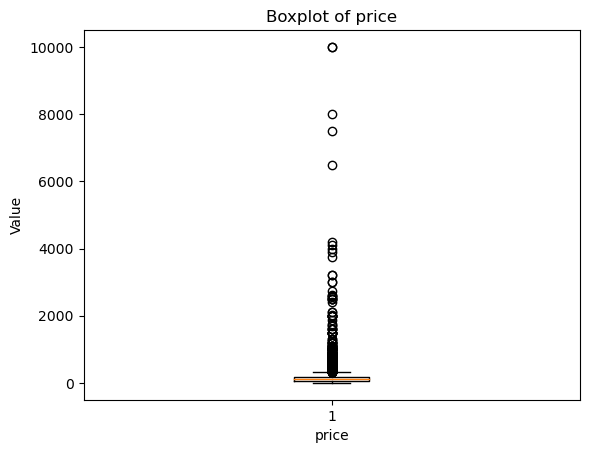

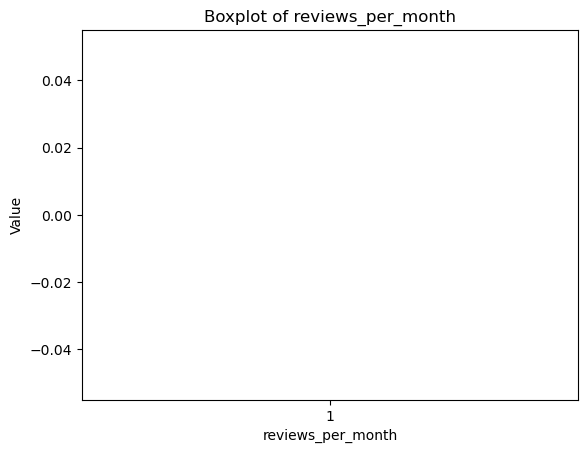

In [73]:
# boxplots to identify outliers in numeric features
for feature in numeric_cols:
    #plt.figure(figsize=(8, 6))
    plt.boxplot(train_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.show()

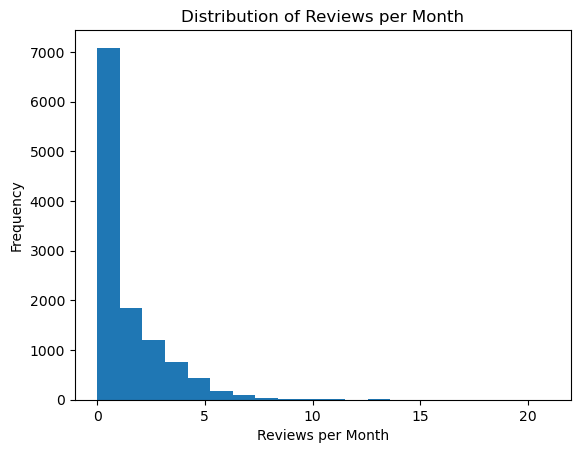

In [74]:
# a histogram for the target variable (reviews_per_month)
plt.hist(train_df['reviews_per_month'], bins=20)
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews per Month')
plt.show()

In [75]:
for column in train_df.columns:
    print(column)

name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [132]:
for col in train_df.columns:
    print(train_df.dtypes) # print all col names and their data types. used to categorize them and determine appropriate transformation

# list all column names
all_columns = train_df.columns.tolist()

target = "reviews_per_month"

# remove the target variable from the list of all columns
#all_columns.remove(target)


name                               object
host_id                           float64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object
name                               object
host_id                           float64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price               

In [133]:
numeric_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']
drop_features = ['name', 'host_id', 'host_name']

numeric_features.sort()
categorical_features.sort()
drop_features.sort()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)
print("Drop Features:", drop_features)



Numeric Features: ['availability_365', 'calculated_host_listings_count', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'price']
Categorical Features: ['last_review', 'neighbourhood', 'neighbourhood_group', 'room_type']
Drop Features: ['host_id', 'host_name', 'name']


In [134]:
imputer = SimpleImputer(strategy='mean')

# imputation for numeric features
train_df[numeric_features] = imputer.fit_transform(train_df[numeric_features])
test_df[numeric_features] = imputer.fit_transform(test_df[numeric_features])

imputer_cat = SimpleImputer(strategy='most_frequent')

# imputation for categorical features
train_df[categorical_features] = imputer_cat.fit_transform(train_df[categorical_features])
test_df[categorical_features] = imputer_cat.fit_transform(test_df[categorical_features])



In [140]:

""" use column transformer to scale numeric features and apply one-hot encoding to cat features """
ct = make_column_transformer(
    (StandardScaler(), numeric_features),  # scaling for numeric features
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),  # one-hot encoding for categorical features
    ("drop", drop_features)  # drop specified features
) # used code snippet in lecure 6 slides

train_df_transformed = ct.fit_transform(train_df)


In [141]:
# applying the same transformations to test data

test_df[numeric_features] = imputer.transform(test_df[numeric_features])
test_df[categorical_features] = imputer_cat.transform(test_df[categorical_features])
test_df_transformed = ct.transform(test_df) # using the same col transformer
 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [142]:
# drop rows with missing target vals
train_df_cleaned = train_df.dropna(subset=['reviews_per_month'])

# redefine features and target
X = train_df_cleaned.drop(columns=['reviews_per_month'])
y = train_df_cleaned['reviews_per_month']

# since it is a regression problem, using dummy regressor as my baseline model
# init and train dummy regressor
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X, y)

dummy_regressor.score(X, y) # umm...
# train on training set
train_predictions = dummy_regressor.predict(X)

# calculate evaluation metrics for train set
train_mae = mean_absolute_error(y, train_predictions)
train_mse = mean_squared_error(y, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y, train_predictions)
print(f"Train MAE: {train_mae}")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R-squared: {train_r2}")

# calcualting MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mean_absolute_percentage_error(y, train_predictions)
print(f"Train MAPE: {train_mape}")





Train MAE: 1.231523248584786
Train MSE: 2.710825921972651
Train RMSE: 1.6464586001392962
Train R-squared: 0.0
Train MAPE: 673.8652884657961


In [143]:
train_predictions = dummy_regressor.predict(X) # predict on train set



In [144]:
...

Ellipsis

<!-- END QUESTION -->



<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_since this is a regression problem, I have decided to start with linear regression and try different linear models in part 8._

In [147]:
X_train = train_df_transformed
y_train = train_df["reviews_per_month"]  # assuming "reviews_per_month" is your target variable

X_test = test_df_transformed
y_test = test_df["reviews_per_month"]

# init and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# still working on this...

ValueError: Input y contains NaN.

In [128]:
test_mae = mean_absolute_error(y_test, predictions)
test_mse = mean_squared_error(y_test, predictions)
test_r2 = r2_score(y_test, predictions)
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

# copied from dummy reg, need to adjust

NameError: name 'y_test' is not defined

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)